# <span style="color:red"> Problem: Dataset of one feature and one output is given. Predict the line that best fit the dataset.</span>

# <span style="color:red">Dataset preparation</span>

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
x = torch.arange(-100, 100, dtype=torch.float32)

In [3]:
y = 5*x + 1

In [4]:
noise = torch.rand(y.shape, dtype=torch.float32)*10
y = y + noise

In [5]:
x = x.view(x.shape[0], -1)

In [6]:
y = y.view(y.shape[0], -1)

In [7]:
DS = {'X': x, 'Y': y}

### Description of some keyworks:
```
DS: dictionary of provided dataset x, y. DS['X'] is x, DS['Y'] is y.
LOSS: list of losses in epochs
```

# <span style="color:green"> Answer: </span>

## Custom dataset

In [8]:
from torch.utils.data.dataset import Dataset

class MyCustomDataset(Dataset):
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return len(self.x) # of how many examples(images?) you have

In [9]:
dataset = MyCustomDataset(DS['X'], DS['Y'])

## DataLoader

In [10]:
from torch.utils.data import DataLoader

batch_size = 32

train_loader = DataLoader(dataset, batch_size, shuffle=True)

# Model

In [11]:
class linear_regression(torch.nn.Module):
    
    def __init__(self, input_size, output_size):
        
        super(linear_regression, self).__init__()
        self.linear = torch.nn.Linear(input_size, output_size)

    def forward(self, x):
        
        out = self.linear(x)
        return out

In [12]:
model = linear_regression(1, 1)

# Loss

In [13]:
criterion = torch.nn.MSELoss() 

# Optimizer

In [14]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.0000001)

In [15]:
with torch.no_grad():
    y_pred = model(DS['X'])

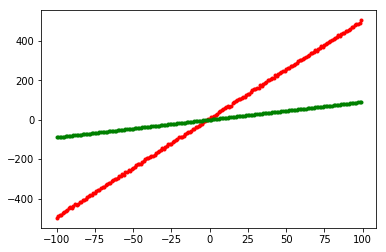

In [16]:
plt.plot(DS['X'].view(-1).numpy(), DS['Y'].view(-1).numpy(), 'r.')
plt.plot(DS['X'].view(-1).numpy(), y_pred.view(-1).numpy(), 'g.')

In [17]:
LOSS = []
for epoch in range(800):
    sum_loss_in_batch = 0.
    for step, (x, y) in enumerate(train_loader):
        y_hat = model(x)
        loss = criterion(y_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sum_loss_in_batch += loss.item()
    
    loss_in_epoch = sum_loss_in_batch/batch_size
    
    print(f"Epoch {epoch} loss: {loss_in_epoch}")
    
    LOSS.append(loss_in_epoch)

Epoch 0 loss: 12603.155517578125
Epoch 1 loss: 12285.610961914062
Epoch 2 loss: 11998.413208007812
Epoch 3 loss: 12030.168334960938
Epoch 4 loss: 11887.658203125
Epoch 5 loss: 11449.192504882812
Epoch 6 loss: 11124.310302734375
Epoch 7 loss: 11348.942749023438
Epoch 8 loss: 11151.215454101562
Epoch 9 loss: 11407.3349609375
Epoch 10 loss: 11992.54248046875
Epoch 11 loss: 10901.2421875
Epoch 12 loss: 10436.916015625
Epoch 13 loss: 10635.177368164062
Epoch 14 loss: 10789.259643554688
Epoch 15 loss: 11094.293334960938
Epoch 16 loss: 10626.801879882812
Epoch 17 loss: 10275.695068359375
Epoch 18 loss: 10197.607543945312
Epoch 19 loss: 10124.973876953125
Epoch 20 loss: 9687.16259765625
Epoch 21 loss: 9699.256591796875
Epoch 22 loss: 9639.571899414062
Epoch 23 loss: 9506.810241699219
Epoch 24 loss: 9869.896789550781
Epoch 25 loss: 10112.23486328125
Epoch 26 loss: 9543.092346191406
Epoch 27 loss: 9596.300415039062
Epoch 28 loss: 9633.2080078125
Epoch 29 loss: 9480.18408203125
Epoch 30 loss: 916

Epoch 285 loss: 853.7883071899414
Epoch 286 loss: 847.9253158569336
Epoch 287 loss: 837.3851699829102
Epoch 288 loss: 822.3219375610352
Epoch 289 loss: 810.6962738037109
Epoch 290 loss: 876.0048217773438
Epoch 291 loss: 796.1424865722656
Epoch 292 loss: 789.7281646728516
Epoch 293 loss: 860.6422119140625
Epoch 294 loss: 799.1822280883789
Epoch 295 loss: 746.0617065429688
Epoch 296 loss: 733.9273262023926
Epoch 297 loss: 821.8319778442383
Epoch 298 loss: 736.890625
Epoch 299 loss: 782.9753799438477
Epoch 300 loss: 775.4300537109375
Epoch 301 loss: 731.3012847900391
Epoch 302 loss: 745.8051223754883
Epoch 303 loss: 782.3783111572266
Epoch 304 loss: 685.9470520019531
Epoch 305 loss: 678.9519920349121
Epoch 306 loss: 719.0941619873047
Epoch 307 loss: 675.2940292358398
Epoch 308 loss: 698.4936218261719
Epoch 309 loss: 687.1939239501953
Epoch 310 loss: 683.7403564453125
Epoch 311 loss: 620.9256687164307
Epoch 312 loss: 640.6181488037109
Epoch 313 loss: 641.0768356323242
Epoch 314 loss: 676.5

Epoch 546 loss: 78.07089376449585
Epoch 547 loss: 82.44419574737549
Epoch 548 loss: 82.6842737197876
Epoch 549 loss: 81.76192140579224
Epoch 550 loss: 74.22505283355713
Epoch 551 loss: 75.93863725662231
Epoch 552 loss: 74.65768384933472
Epoch 553 loss: 78.3398027420044
Epoch 554 loss: 72.07726097106934
Epoch 555 loss: 73.5038480758667
Epoch 556 loss: 72.73694849014282
Epoch 557 loss: 75.5215482711792
Epoch 558 loss: 70.25355386734009
Epoch 559 loss: 77.61059093475342
Epoch 560 loss: 76.433913230896
Epoch 561 loss: 75.55597162246704
Epoch 562 loss: 69.87935781478882
Epoch 563 loss: 71.1204285621643
Epoch 564 loss: 69.4830436706543
Epoch 565 loss: 66.63186931610107
Epoch 566 loss: 72.85365390777588
Epoch 567 loss: 70.30174922943115
Epoch 568 loss: 65.16711902618408
Epoch 569 loss: 65.63510704040527
Epoch 570 loss: 70.29960536956787
Epoch 571 loss: 73.2160415649414
Epoch 572 loss: 71.15444564819336
Epoch 573 loss: 61.49574518203735
Epoch 574 loss: 61.57128381729126
Epoch 575 loss: 61.8280

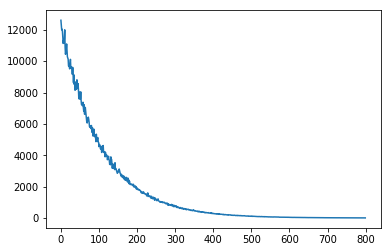

In [18]:
import matplotlib.pyplot as plt
plt.plot(LOSS)

In [19]:
with torch.no_grad():
    y_pred = model(DS['X'])

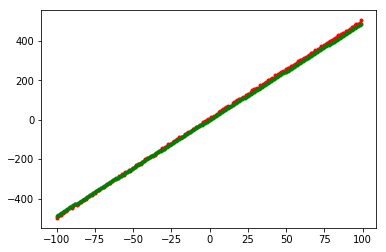

In [20]:
plt.plot(DS['X'].view(-1).numpy(), DS['Y'].view(-1).numpy(), 'r.')
plt.plot(DS['X'].view(-1).numpy(), y_pred.view(-1).numpy(), 'g.')